In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#load the dataset
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
#droping all the unwanted columns
df=df.drop(["area_type","availability","society","balcony"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [6]:
#Handling the missing values in location column
df['location'].value_counts() #as whitefiled is repeated fro more time
df['location']=df['location'].fillna('whitefield')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [7]:
#handling missing values in size column
df['size'].value_counts() #2bhk repeated for more times
df['size']=df['size'].fillna('2 BHK ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
#Handling missing values in bath column
df['bath']=df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
#cleaning size column
df['size'].unique()
out=[i.split()[0] for i in df['size']]
df['bhk']=out
df.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
#convert bhk column from object to int data type
df['bhk']=df['bhk'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 572.5+ KB


In [12]:
#cleaning total_sqft
df['total_sqft'].unique()
def convert(a):
    l=a.split('-')
    if len(l)==2:
        return(float(l[0])+float(l[1]))/2
    try:
        return float(a)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert)
df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median())
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 572.5+ KB


In [13]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
#cleaning location
df['location']=df['location'].apply(lambda x:x.strip())
df['location'].value_counts()

location
Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1295, dtype: int64

In [16]:
location_count=df['location'].value_counts()
loc_less_than_10=location_count[location_count<=10]
loc_less_than_10

location
BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: count, Length: 1054, dtype: int64

In [17]:
df['location']=df['location'].apply(lambda x:'other' if x in loc_less_than_10 else x)
df['location'].value_counts()

location
other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [18]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+03
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [20]:
#df.to_csv('cleaned_data.csv', index=False)

In [21]:
#07-08-2025 handling the outliers like ex: we cant have total_sqft min(1)

In [22]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+03
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
#handling the outliiers in total qft
df=df[(df['total_sqft']/df['bhk'])>=300]

In [25]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [26]:
#df=df[df['total_sqft']>=df['bhk']*300] for cross verification for aboe same condition reversing

<Axes: ylabel='bath'>

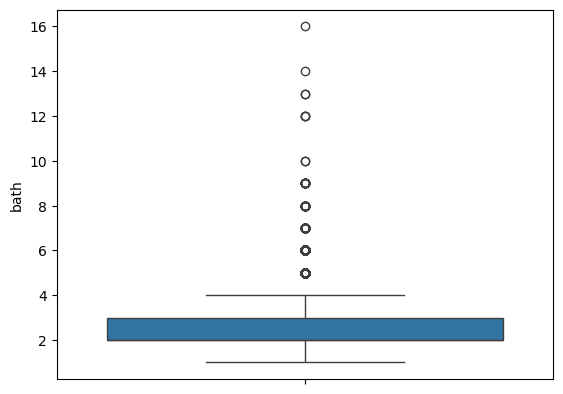

In [27]:
sns.boxplot(y='bath', data=df) # in graph o oo oo o are called as outliers

<Axes: ylabel='bath'>

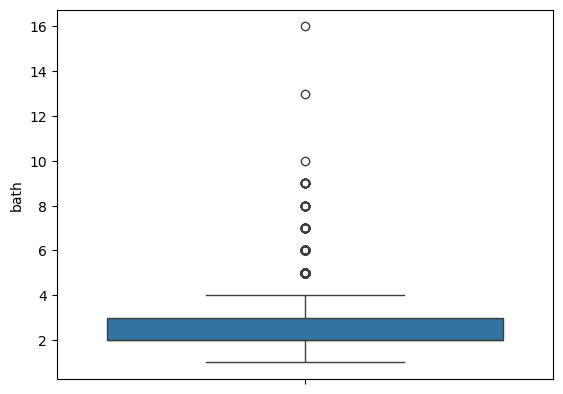

In [28]:
#handling the outliers in bath
df=df[df['bath']<=df['bhk']]
sns.boxplot(y='bath', data=df) # in below graph we can see the outliers reduced

<Axes: ylabel='bath'>

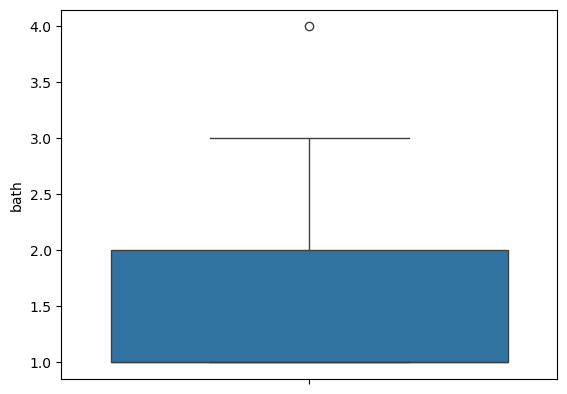

In [29]:
df=df[df['bath']<=df['bhk']//2]
sns.boxplot(y='bath', data=df) # in below graph we can see the outliers reduced almost #only one outlier we can ignore

<Axes: ylabel='bhk'>

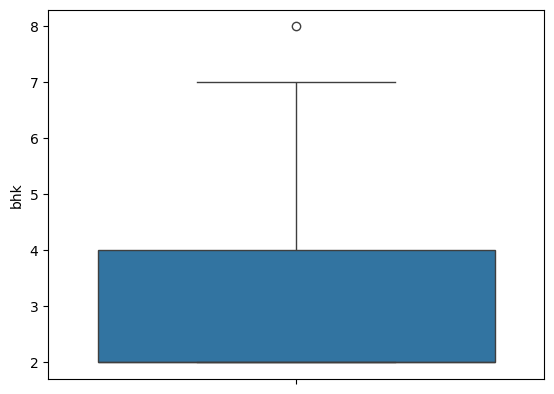

In [30]:
#handling the outliers in bhk
sns.boxplot(y='bhk',data=df) #only one outlier we cn ignore

<Axes: ylabel='price_per_sqft'>

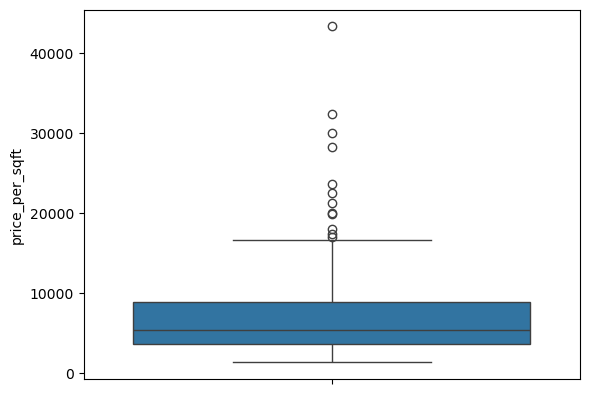

In [31]:
#handling the outliers in pricepersqft
sns.boxplot(y='price_per_sqft',data=df)

<Axes: ylabel='price_per_sqft'>

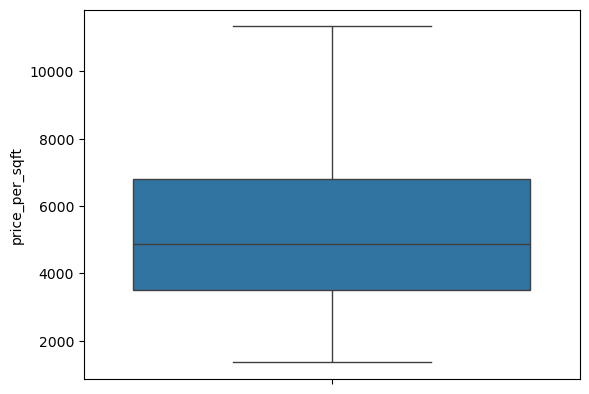

In [32]:
#handling the outliers in price_per_sqft iqr method
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR=q3-q1
low_bound=q1-0.5*IQR
upp_bound=q3+0.5*IQR
df=df[(df['price_per_sqft']>=low_bound) & (df['price_per_sqft']<= upp_bound)]
sns.boxplot(y='price_per_sqft',data=df)

In [33]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
56,Devanahalli,4 Bedroom,3210.0,2.0,192.0,4,5981.308411
81,Hennur Road,4 Bedroom,3203.5,2.0,224.5,4,7007.960044
101,Chandapura,2 BHK,650.0,1.0,17.0,2,2615.384615
132,Electronic City,2 BHK,880.0,1.0,16.5,2,1875.000000


In [34]:
df=df.drop(['size','price_per_sqft'],axis=1)
df.head()

,location,total_sqft,bath,price,bhk
26,Electronic City,660.0,1.0,23.1,2
56,Devanahalli,3210.0,2.0,192.0,4
81,Hennur Road,3203.5,2.0,224.5,4
101,Chandapura,650.0,1.0,17.0,2
132,Electronic City,880.0,1.0,16.5,2


<Axes: ylabel='total_sqft'>

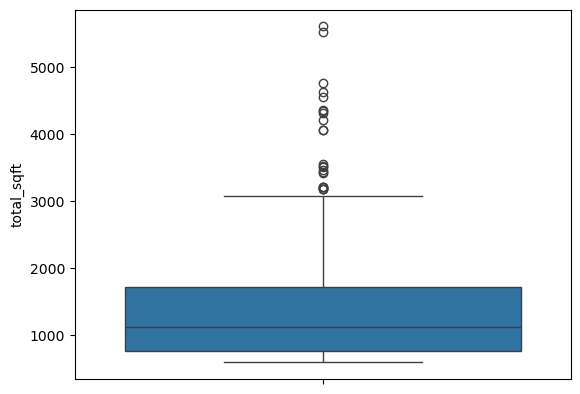

In [35]:
sns.boxplot(y='total_sqft',data=df)

<Axes: ylabel='total_sqft'>

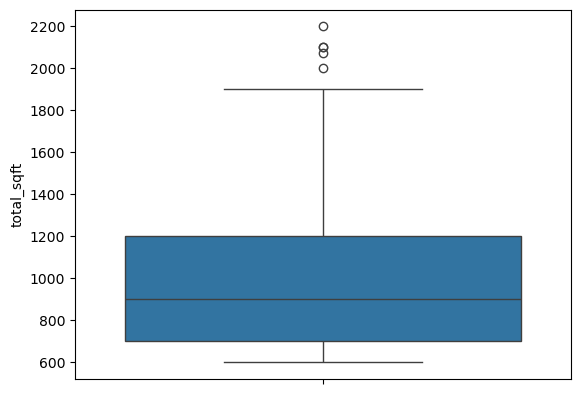

In [36]:
#handling the outliers in total_sqft using iqr method
q1=df['total_sqft'].quantile(0.25)
q3=df['total_sqft'].quantile(0.75)
IQR=q3-q1
low_bound=q1-0.5*IQR
upp_bound=q3+0.5*IQR
df=df[(df['total_sqft'] >= low_bound) & (df['total_sqft'] <= upp_bound)]
sns.boxplot(y='total_sqft',data=df)

<Axes: ylabel='bath'>

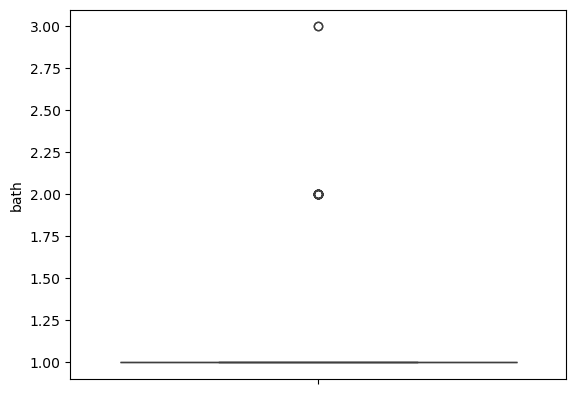

In [37]:
sns.boxplot(y='bath',data=df)

In [38]:
df.head()

,location,total_sqft,bath,price,bhk
26,Electronic City,660.0,1.0,23.1,2
101,Chandapura,650.0,1.0,17.0,2
132,Electronic City,880.0,1.0,16.5,2
179,Electronic City,770.0,1.0,36.0,2
250,Chandapura,800.0,1.0,20.0,2


In [39]:
copied_dataset=df.copy()# shallow copy

In [40]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['location']=obj.fit_transform(df['location'])
df.head()

,location,total_sqft,bath,price,bhk
26,17,660.0,1.0,23.1,2
101,11,650.0,1.0,17.0,2
132,17,880.0,1.0,16.5,2
179,17,770.0,1.0,36.0,2
250,11,800.0,1.0,20.0,2


In [41]:
df.reset_index(inplace=True)
df=df.drop('index',axis=1)
df

,location,total_sqft,bath,price,bhk
0,17,660.0,1.0,23.1,2
1,11,650.0,1.0,17.0,2
2,17,880.0,1.0,16.5,2
3,17,770.0,1.0,36.0,2
4,11,800.0,1.0,20.0,2
...,...,...,...,...,...
150,2,625.0,1.0,25.0,2
151,56,1350.0,1.0,120.0,3
152,13,1425.0,1.0,54.0,3
153,47,600.0,1.0,65.0,2


In [42]:
copied_dataset

,location,total_sqft,bath,price,bhk
26,Electronic City,660.0,1.0,23.1,2
101,Chandapura,650.0,1.0,17.0,2
132,Electronic City,880.0,1.0,16.5,2
179,Electronic City,770.0,1.0,36.0,2
250,Chandapura,800.0,1.0,20.0,2
...,...,...,...,...,...
12998,Anekal,625.0,1.0,25.0,2
13000,other,1350.0,1.0,120.0,3
13136,Chikkalasandra,1425.0,1.0,54.0,3
13183,Shivaji Nagar,600.0,1.0,65.0,2


In [43]:
X=df.drop('price',axis=1)
y=df['price']

In [44]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
model=RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6]


}

In [46]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [47]:
print(f'training_efficiency:{grid.score(Xtrain,ytrain)}')
print(f'testingefficiency:{grid.score(Xtest,ytest)}')

training_efficiency:0.7408688722939216
testingefficiency:0.6543302917043714


In [48]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(grid,file)

In [49]:
copied_dataset.to_csv('copied.csv')

In [50]:
import sklearn
sklearn.__version__

'1.4.2'